In [7]:
%matplotlib inline

from datetime import datetime
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3

mpld3.enable_notebook()

def parse_timestamp(ts):
    # Postgres' funky timestamp formatting.
    try:
        return datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f")
    except ValueError:
        return datetime.strptime(ts, "%Y-%m-%d %H:%M:%S")

converters = {
    'T': parse_timestamp
}

csv = pd.read_csv("data/pralka.csv.gz", header=None, names=['T', 'accel'], index_col='T', converters=converters)

In [8]:
selection = csv['2017-03-20':'2017-03-20']

In [9]:
quantiles = selection['accel'].quantile([.99, .995])
quantiles

0.990    161.52
0.995    348.46
Name: accel, dtype: float64

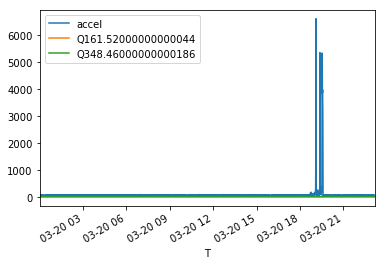

In [12]:
quantiled = pd.DataFrame({'accel' : selection['accel']}, index=selection.index)
labels = ['accel']
for i, q in enumerate(quantiles.values):
    def classify(s):
        if s > q:
            return i+1
        else:
            return 0
    label = "Q{}".format(q)
    labels.append(label)
    
    quantiled[label] = quantiled['accel'].rolling(window=50).mean().apply(classify)
quantiled.plot(y=labels)